In [1]:
from PIL import Image as image 
from PIL import ImageFilter
from PIL import ImageOps as ops
import numpy as maths
import pandas as analytics
import os
import matplotlib.pyplot as graph
import warnings
warnings.filterwarnings("ignore")

# Functions and CONST_VARS

In [2]:
y_top = 5
x_right = 1088
x_left = 225
y_bottom = 955

In [3]:
def window(x,y,req_image,window_size = 5, colour = 0):
    """Window function """

    size = window_size//2

    x_left = x - size
    x_right = x + size + 1
    y_top = y - size
    y_bottom = y + size + 1 
    
    if x_left <= left : x_left = left
    if x_right >= right : x_right = right
    if y_top <= top : y_top = top
    if y_bottom >= bottom : y_bottom = bottom

    x_range = maths.arange(x_left,x_right,1)
    y_range = maths.arange(y_top,y_bottom,1)

    for row in x_range :
        for col in y_range:
            req_image.putpixel((row,col),colour)
    
    return req_image

def kernel(x,y):
    political_copy = political_imap.copy()
    a = maths.linspace(-1,1,4)
    x_range = [i+x for i in a]
    y_range = [i+y for i in a]
    l = []
    for px in x_range :
        for py in y_range :
            l.append(political_copy.getpixel((px,py)))
    l = maths.array(l)
            
    return l            

# Image Processing

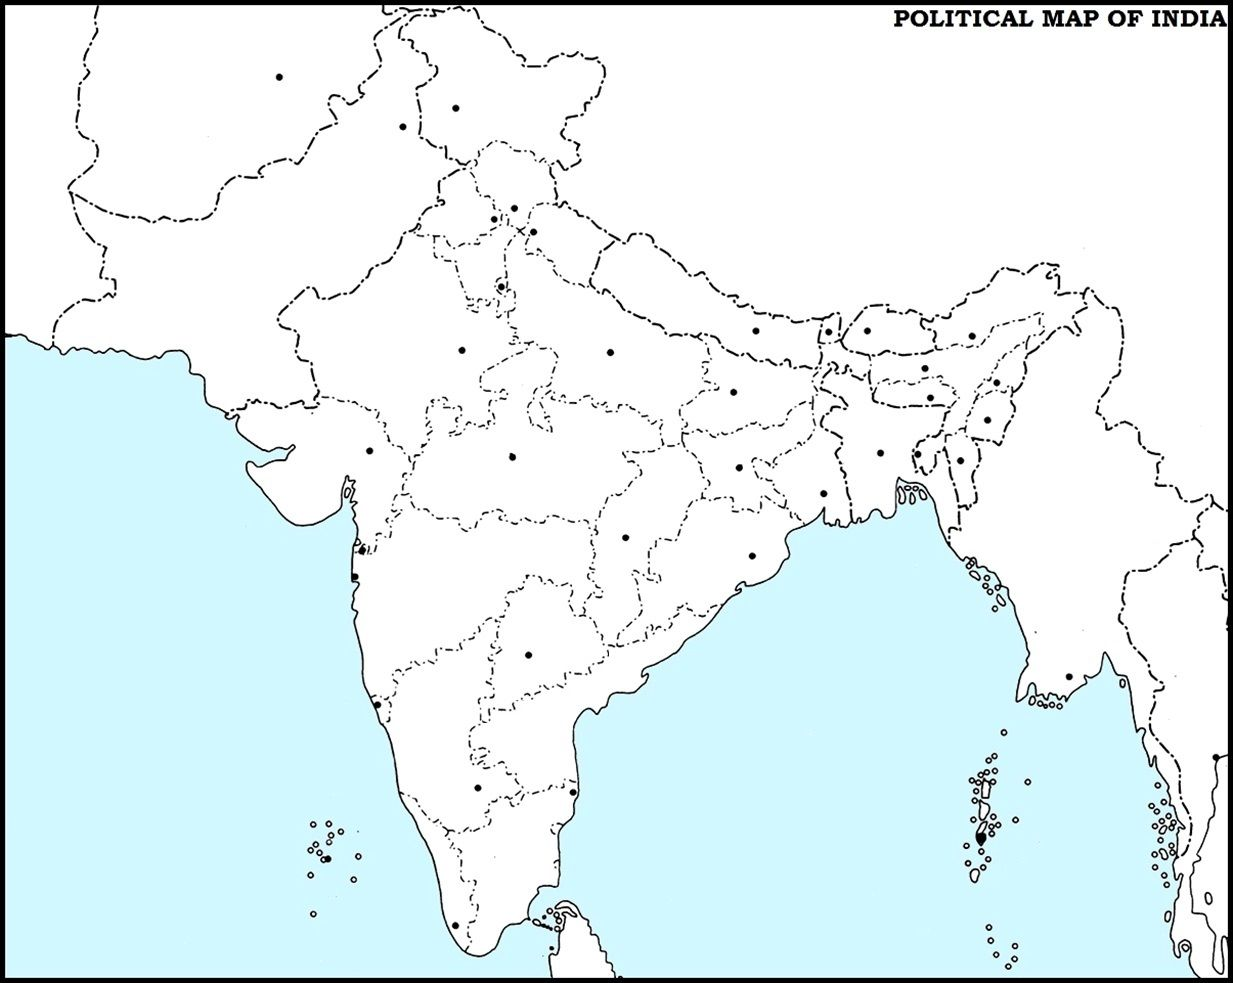

In [4]:
political_imap = image.open("../data/pictures/2df7da34eec4dae39226528b54afbbf6.jpg")
political_imap

In [5]:
political_imap = political_imap.convert(mode = 'L')
for x in range(political_imap.size[0]) :
    for y in range(political_imap.size[1]):
        if political_imap.getpixel((x,y)) > 50 : political_imap.putpixel((x,y),255)
        else : political_imap.putpixel((x,y),0)
box = (x_left, y_top, x_right, y_bottom)
political_imap = political_imap.crop(box = box) 

y_bottom_pol = 80
x_left_pol = 650

for x in range(x_left_pol,political_imap.size[0]):
    for y in range(y_bottom_pol):
        political_imap.putpixel((x,y),255)

# Pixel Value Extraction

In [6]:
pixels = []
political_copy = political_imap.copy()
for x in range(1,political_copy.size[0] - 2):
    for y in range(1,political_copy.size[1] - 2):
        if (kernel(x,y) == 0).all() : pixels.append((x,y))

In [7]:
points = []

for i in range(len(pixels)//9) :
    l = maths.matrix(pixels[i*9 + 0 : i*9 + 9])
    points.append((int(l[:,0].mean()),int(l[:,1].mean())))

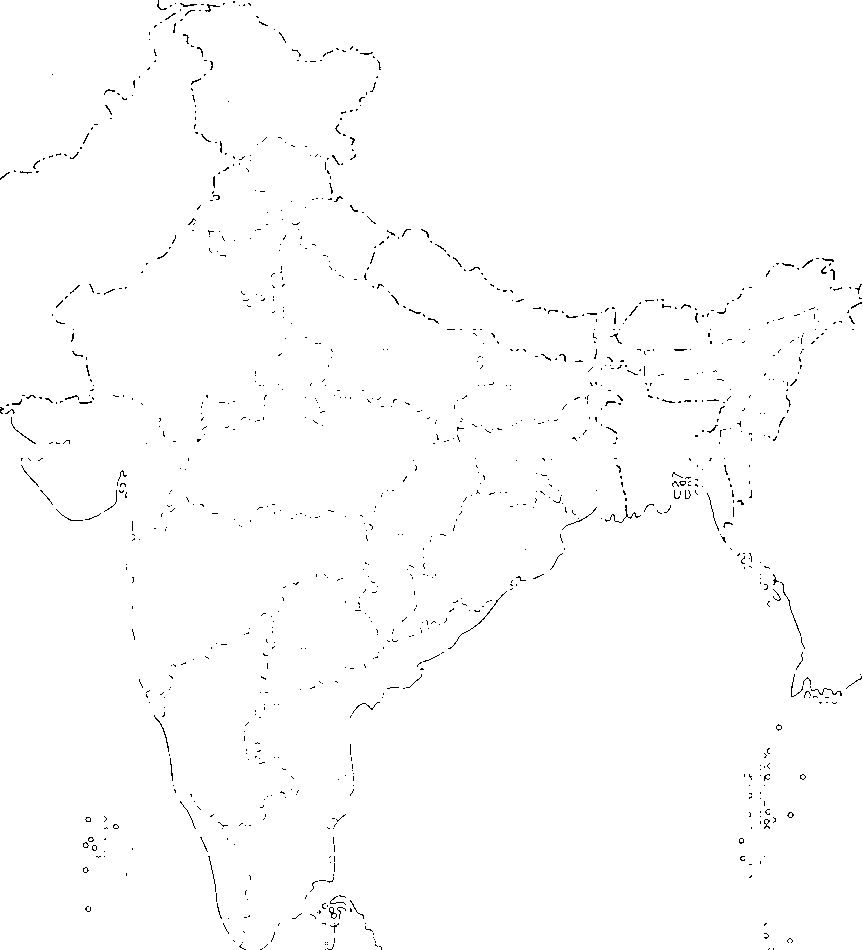

In [8]:
political_copy = political_imap.copy()
for point in pixels :
    for x in range(political_copy.size[0]) : political_copy.putpixel((x,point[1]),255)
    for y in range(political_copy.size[1]) : political_copy.putpixel((point[0],y),255)

political_copy.save('../data/pictures/final_map.jpg')
political_copy

In [9]:
pixels = maths.matrix(pixels)
x = [float(i) for i in pixels[:,0]]
y = [float(i) for i in pixels[:,1]]
analytics.DataFrame(data = {'x':x , 'y':y}).to_csv('../data/documents/pixel_values.csv',index = False)

In [10]:
points = maths.matrix(points)
x = [float(i) for i in points[:,0]]
y = [float(i) for i in points[:,1]]
analytics.DataFrame(data = {'x':x , 'y':y}).to_csv('../data/documents/points_values.csv',index = False)